## Model Fitting and Evaluation

In [1]:
import pipeline
import pandas as pd
import numpy as np
import importlib
importlib.reload(pipeline)

<module 'pipeline' from '/Users/piyushtank/Dropbox/mscapp/spring_20/machine_learning/project/covid/git/ml-covid/scripts/pipeline.py'>

In [2]:
filepath = '../data/covid_df_protocol_3.pkl'
df = pd.read_pickle(filepath)
df['log_cases'] = np.log(df['Confirmed Cases'] + 1)

### Validations

- Splitting by time (last 2 weeks as a test data and remaining earlier weeks for training the model)

In [15]:
# getting train and test dataframes
df_train, df_test = pipeline.split_and_scale_on_last_weeks(df, 2)
#sanity chceck
pipeline.sanity_check(df_train, df_test)

Success: Features match
Success: No NAs remain


                           Feature  Coefficient
0                        Intercept     2.485656
8             EconomicSupportIndex     0.170124
19   Days Elapsed Since First Case     0.065121
18                       Day Count     0.003454
149            Country_Switzerland     0.000000
..                             ...          ...
77                  Country_Guinea     0.000000
78                   Country_Haiti    -0.000000
79                Country_Honduras    -0.000000
80                 Country_Hungary     0.000000
215         H3_Contact tracing_2.0    -0.000000

[216 rows x 2 columns]


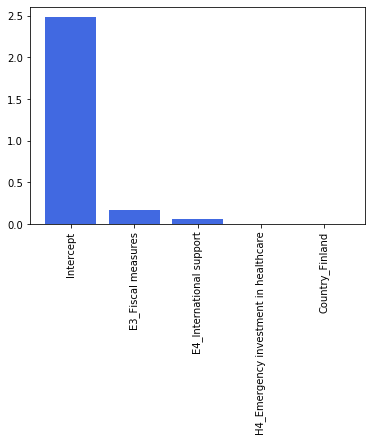

Lasso: Features with highest magnitude                                coefficients in absolute value
                           Feature  Coefficient
0                        Intercept     2.485656
8             EconomicSupportIndex     0.170124
19   Days Elapsed Since First Case     0.065121
18                       Day Count     0.003454
149            Country_Switzerland     0.000000
139              Country_Singapore    -0.000000
140        Country_Slovak Republic     0.000000
141               Country_Slovenia     0.000000
142           Country_South Africa     0.000000
143            Country_South Korea     0.000000

Bias: 3.24
Mean squared error: 4.33
RSS: 6584.70
Variance score: 0.76

R2 score: 0.35

                       Feature  Coefficient
0                    Intercept     7.789003
110           Country_Mongolia    -2.639700
143        Country_South Korea    -2.539021
84                Country_Iran     2.165731
154        Country_Timor-Leste    -1.843747
..                 

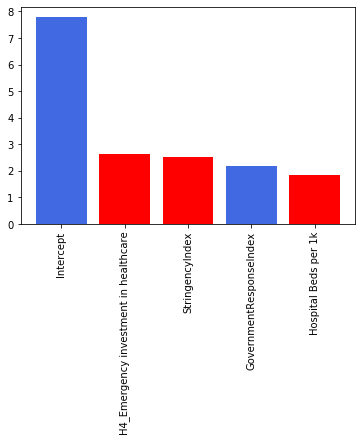

Ridge: Features with highest magnitude                                coefficients in absolute value
                   Feature  Coefficient
0                Intercept     7.789003
110       Country_Mongolia    -2.639700
143    Country_South Korea    -2.539021
84            Country_Iran     2.165731
154    Country_Timor-Leste    -1.843747
88           Country_Italy     1.830607
203  E1_Income support_2.0     1.787047
114          Country_Nepal    -1.692957
201  E1_Income support_0.0    -1.672767
166        Country_Vietnam    -1.637797

Bias: 1.26
Mean squared error: 1.67
RSS: 2544.78
Variance score: 0.91

R2 score: 0.75

                       Feature  Coefficient
7       ContainmentHealthIndex  -756.408148
5              StringencyIndex   424.610525
6      GovernmentResponseIndex   295.593364
212      H2_Testing policy_3.0    64.837062
209      H2_Testing policy_0.0   -64.264182
..                         ...          ...
13             Life Expectancy    -0.022546
158             Cou

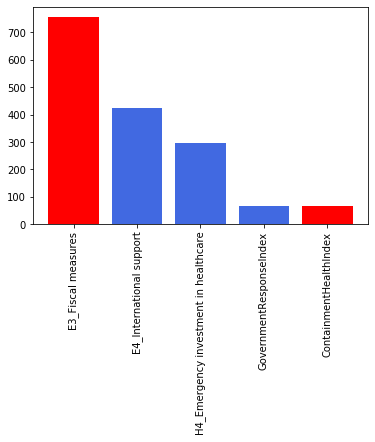

Linear Regression: Features with highest magnitude                                coefficients in absolute value
                     Feature  Coefficient
7     ContainmentHealthIndex  -756.408148
5            StringencyIndex   424.610525
6    GovernmentResponseIndex   295.593364
212    H2_Testing policy_3.0    64.837062
209    H2_Testing policy_0.0   -64.264182
213   H3_Contact tracing_0.0   -64.235568
215   H3_Contact tracing_2.0    64.036282
0                  Intercept    50.548686
8       EconomicSupportIndex   -42.113270
210    H2_Testing policy_1.0   -21.880054

Bias: 1.26
Mean squared error: 1.65
RSS: 2508.57
Variance score: 0.91

R2 score: 0.75



In [22]:
# Getting Features and outcome variables
X_train, y_train = pipeline.divide_target_and_features(df_train, 'log_cases')
X_test, y_test = pipeline.divide_target_and_features(df_test, 'log_cases')
results_dict = pipeline.train_and_evaluate(X_train, y_train, X_test, y_test)

In [29]:
# comparing the R2 for all three models
rs = pd.DataFrame(results_dict) 
rs['metrics']= ['Bias','MSE','RSS','Variance','R2']
rs.set_index('metrics')

,Lasso,Ridge,Linear Regression
metrics,,,
Bias,3.241517,1.258318,1.255227
MSE,4.329194,1.673097,1.649287
RSS,6584.704244,2544.780960,2508.565658
Variance,0.758222,0.906145,0.906375
R2,0.348690,0.748289,0.751871


#### Time Series Nested Cross Validation

Time series Nested Cross Validation is carried out with the following approach: 

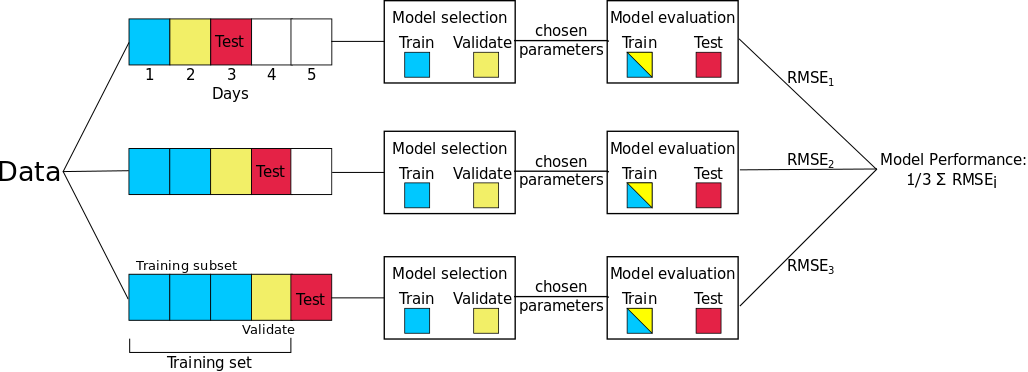

Cutting dataframe on date: 2020-06-02
Success: Features match
Success: No NAs remain
                           Feature  Coefficient
0                        Intercept     2.485656
8             EconomicSupportIndex     0.170124
19   Days Elapsed Since First Case     0.065121
18                       Day Count     0.003454
149            Country_Switzerland     0.000000
..                             ...          ...
77                  Country_Guinea     0.000000
78                   Country_Haiti    -0.000000
79                Country_Honduras    -0.000000
80                 Country_Hungary     0.000000
215         H3_Contact tracing_2.0    -0.000000

[216 rows x 2 columns]


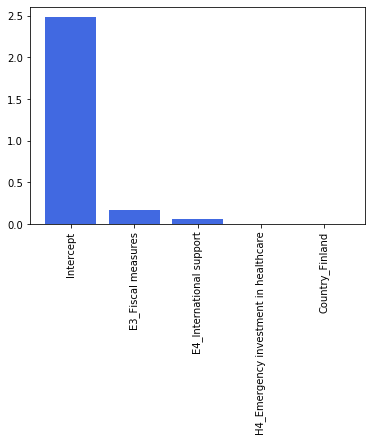

Lasso: Features with highest magnitude                                coefficients in absolute value
                           Feature  Coefficient
0                        Intercept     2.485656
8             EconomicSupportIndex     0.170124
19   Days Elapsed Since First Case     0.065121
18                       Day Count     0.003454
149            Country_Switzerland     0.000000
139              Country_Singapore    -0.000000
140        Country_Slovak Republic     0.000000
141               Country_Slovenia     0.000000
142           Country_South Africa     0.000000
143            Country_South Korea     0.000000

Bias: 3.24
Mean squared error: 4.33
RSS: 6584.70
Variance score: 0.76

R2 score: 0.35

                       Feature  Coefficient
0                    Intercept     7.789003
110           Country_Mongolia    -2.639700
143        Country_South Korea    -2.539021
84                Country_Iran     2.165731
154        Country_Timor-Leste    -1.843747
..                 

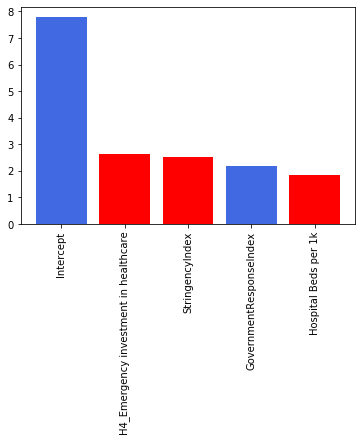

Ridge: Features with highest magnitude                                coefficients in absolute value
                   Feature  Coefficient
0                Intercept     7.789003
110       Country_Mongolia    -2.639700
143    Country_South Korea    -2.539021
84            Country_Iran     2.165731
154    Country_Timor-Leste    -1.843747
88           Country_Italy     1.830607
203  E1_Income support_2.0     1.787047
114          Country_Nepal    -1.692957
201  E1_Income support_0.0    -1.672767
166        Country_Vietnam    -1.637797

Bias: 1.26
Mean squared error: 1.67
RSS: 2544.78
Variance score: 0.91

R2 score: 0.75

                       Feature  Coefficient
7       ContainmentHealthIndex  -756.408148
5              StringencyIndex   424.610525
6      GovernmentResponseIndex   295.593364
212      H2_Testing policy_3.0    64.837062
209      H2_Testing policy_0.0   -64.264182
..                         ...          ...
13             Life Expectancy    -0.022546
158             Cou

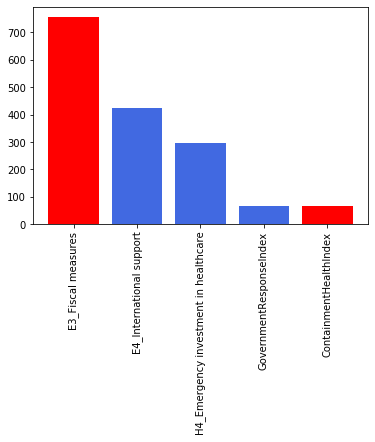

Linear Regression: Features with highest magnitude                                coefficients in absolute value
                     Feature  Coefficient
7     ContainmentHealthIndex  -756.408148
5            StringencyIndex   424.610525
6    GovernmentResponseIndex   295.593364
212    H2_Testing policy_3.0    64.837062
209    H2_Testing policy_0.0   -64.264182
213   H3_Contact tracing_0.0   -64.235568
215   H3_Contact tracing_2.0    64.036282
0                  Intercept    50.548686
8       EconomicSupportIndex   -42.113270
210    H2_Testing policy_1.0   -21.880054

Bias: 1.26
Mean squared error: 1.65
RSS: 2508.57
Variance score: 0.91

R2 score: 0.75

Cutting dataframe on date: 2020-05-26
Success: Features match
Success: No NAs remain
                           Feature  Coefficient
0                        Intercept     2.399573
8             EconomicSupportIndex     0.215165
19   Days Elapsed Since First Case     0.063551
18                       Day Count     0.004941
150         

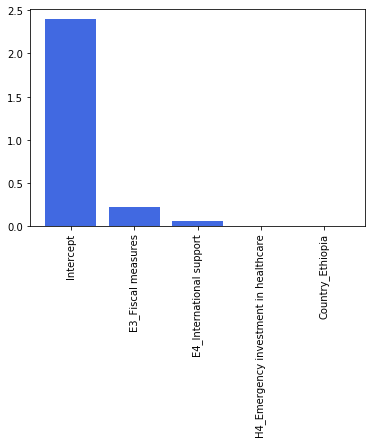

Lasso: Features with highest magnitude                                coefficients in absolute value
                           Feature  Coefficient
0                        Intercept     2.399573
8             EconomicSupportIndex     0.215165
19   Days Elapsed Since First Case     0.063551
18                       Day Count     0.004941
150                 Country_Sweden    -0.000000
140           Country_Sierra Leone     0.000000
141              Country_Singapore    -0.000000
142        Country_Slovak Republic     0.000000
143               Country_Slovenia     0.000000
144           Country_South Africa     0.000000

Bias: 3.15
Mean squared error: 4.12
RSS: 8506.09
Variance score: 0.75

R2 score: 0.39

                       Feature  Coefficient
0                    Intercept     7.893524
85                Country_Iran     2.065465
116              Country_Nepal    -1.959081
205      E1_Income support_2.0     1.808837
31             Country_Belarus     1.745974
..                 

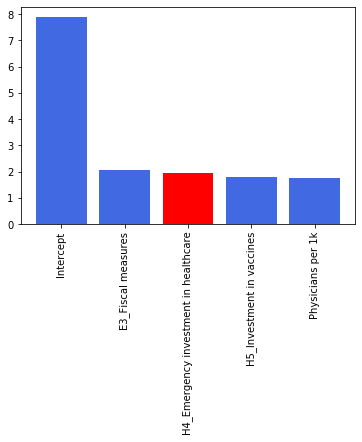

Ridge: Features with highest magnitude                                coefficients in absolute value
                         Feature  Coefficient
0                      Intercept     7.893524
85                  Country_Iran     2.065465
116                Country_Nepal    -1.959081
205        E1_Income support_2.0     1.808837
31               Country_Belarus     1.745974
203        E1_Income support_0.0    -1.688798
206  E2_Debt/contract relief_0.0    -1.531079
112             Country_Mongolia    -1.471037
168              Country_Vietnam    -1.438047
83                 Country_India    -1.437257

Bias: 1.23
Mean squared error: 2.05
RSS: 4227.45
Variance score: 0.90

R2 score: 0.70

                                      Feature   Coefficient
0                                   Intercept  2.626503e+10
195  C7_Restrictions on internal movement_0.0 -7.438659e+09
197  C7_Restrictions on internal movement_2.0 -7.438659e+09
196  C7_Restrictions on internal movement_1.0 -7.438659e+09
172  

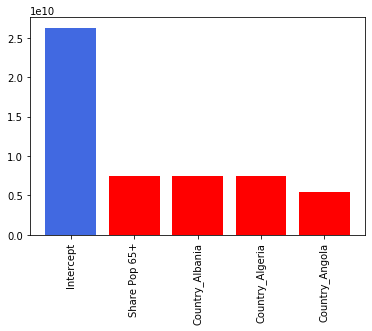

Linear Regression: Features with highest magnitude                                coefficients in absolute value
                                      Feature   Coefficient
0                                   Intercept  2.626503e+10
195  C7_Restrictions on internal movement_0.0 -7.438659e+09
197  C7_Restrictions on internal movement_2.0 -7.438659e+09
196  C7_Restrictions on internal movement_1.0 -7.438659e+09
172                     C1_School closing_0.0 -5.478935e+09
175                     C1_School closing_3.0 -5.478935e+09
174                     C1_School closing_2.0 -5.478935e+09
173                     C1_School closing_1.0 -5.478935e+09
203                     E1_Income support_0.0 -4.143438e+09
204                     E1_Income support_1.0 -4.143438e+09

Bias: 1.22
Mean squared error: 2.03
RSS: 4191.35
Variance score: 0.90

R2 score: 0.70

Cutting dataframe on date: 2020-05-19
Success: Features match
Success: No NAs remain
                           Feature  Coefficient
0     

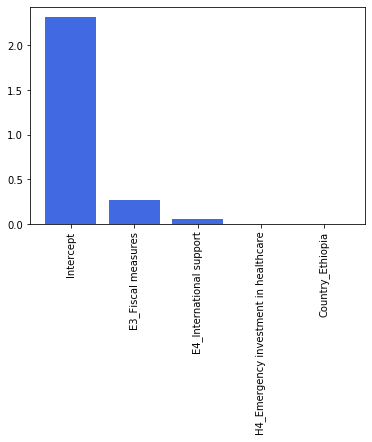

Lasso: Features with highest magnitude                                coefficients in absolute value
                           Feature  Coefficient
0                        Intercept     2.316999
8             EconomicSupportIndex     0.267259
19   Days Elapsed Since First Case     0.061589
18                       Day Count     0.006140
150                 Country_Sweden    -0.000000
140           Country_Sierra Leone     0.000000
141              Country_Singapore    -0.000000
142        Country_Slovak Republic     0.000000
143               Country_Slovenia     0.000000
144           Country_South Africa     0.000000

Bias: 3.04
Mean squared error: 3.98
RSS: 8390.79
Variance score: 0.74

R2 score: 0.43

                       Feature  Coefficient
0                    Intercept     8.252117
85                Country_Iran     2.082350
116              Country_Nepal    -1.859427
205      E1_Income support_2.0     1.854272
203      E1_Income support_0.0    -1.712751
..                 

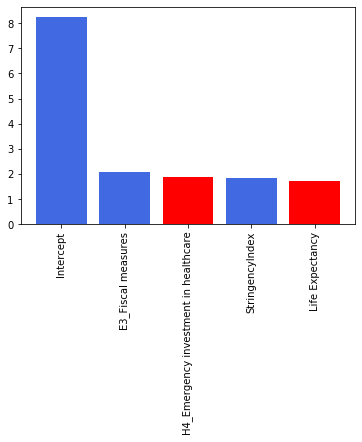

Ridge: Features with highest magnitude                                coefficients in absolute value
                         Feature  Coefficient
0                      Intercept     8.252117
85                  Country_Iran     2.082350
116                Country_Nepal    -1.859427
205        E1_Income support_2.0     1.854272
203        E1_Income support_0.0    -1.712751
31               Country_Belarus     1.632383
206  E2_Debt/contract relief_0.0    -1.499048
112             Country_Mongolia    -1.455178
83                 Country_India    -1.406608
172        C1_School closing_0.0    -1.402435

Bias: 1.18
Mean squared error: 2.23
RSS: 4695.55
Variance score: 0.90

R2 score: 0.68

                       Feature  Coefficient
7       ContainmentHealthIndex  -637.859870
5              StringencyIndex   550.045254
214      H2_Testing policy_3.0    84.921625
211      H2_Testing policy_0.0   -84.397368
215     H3_Contact tracing_0.0   -84.332780
..                         ...          .

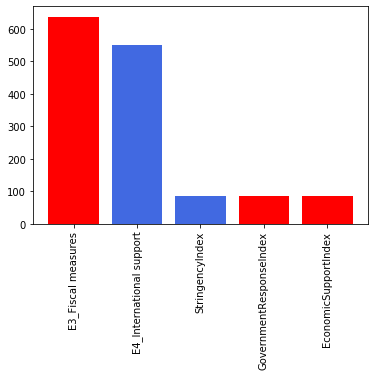

Linear Regression: Features with highest magnitude                                coefficients in absolute value
                     Feature  Coefficient
7     ContainmentHealthIndex  -637.859870
5            StringencyIndex   550.045254
214    H2_Testing policy_3.0    84.921625
211    H2_Testing policy_0.0   -84.397368
215   H3_Contact tracing_0.0   -84.332780
217   H3_Contact tracing_2.0    84.152590
0                  Intercept    75.482895
212    H2_Testing policy_1.0   -28.562895
213    H2_Testing policy_2.0    28.038638
6    GovernmentResponseIndex     6.753681

Bias: 1.18
Mean squared error: 2.22
RSS: 4680.32
Variance score: 0.90

R2 score: 0.68

Cutting dataframe on date: 2020-05-12
Success: Features match
Success: No NAs remain
                           Feature  Coefficient
0                        Intercept     2.230787
8             EconomicSupportIndex     0.317073
19   Days Elapsed Since First Case     0.059208
18                       Day Count     0.007030
150         

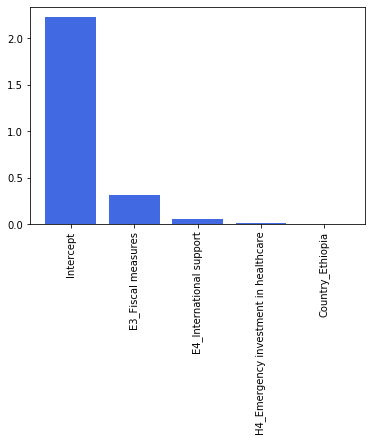

Lasso: Features with highest magnitude                                coefficients in absolute value
                           Feature  Coefficient
0                        Intercept     2.230787
8             EconomicSupportIndex     0.317073
19   Days Elapsed Since First Case     0.059208
18                       Day Count     0.007030
150                 Country_Sweden    -0.000000
140           Country_Sierra Leone     0.000000
141              Country_Singapore    -0.000000
142        Country_Slovak Republic     0.000000
143               Country_Slovenia     0.000000
144           Country_South Africa     0.000000

Bias: 2.93
Mean squared error: 3.94
RSS: 8272.37
Variance score: 0.73

R2 score: 0.45

                       Feature  Coefficient
0                    Intercept     8.527479
85                Country_Iran     2.068363
205      E1_Income support_2.0     1.900027
116              Country_Nepal    -1.740036
203      E1_Income support_0.0    -1.712530
..                 

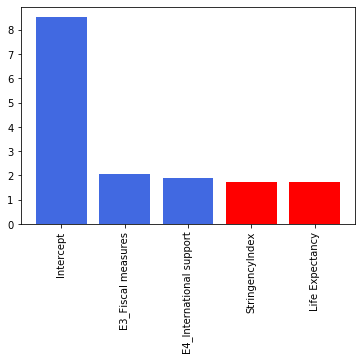

Ridge: Features with highest magnitude                                coefficients in absolute value
                         Feature  Coefficient
0                      Intercept     8.527479
85                  Country_Iran     2.068363
205        E1_Income support_2.0     1.900027
116                Country_Nepal    -1.740036
203        E1_Income support_0.0    -1.712530
31               Country_Belarus     1.494196
112             Country_Mongolia    -1.461494
206  E2_Debt/contract relief_0.0    -1.454217
172        C1_School closing_0.0    -1.415842
83                 Country_India    -1.379767

Bias: 1.13
Mean squared error: 2.33
RSS: 4899.54
Variance score: 0.90

R2 score: 0.67

                                   Feature   Coefficient
0                                Intercept -9.674786e+09
182            C3_Cancel public events_2.0  6.314511e+09
181            C3_Cancel public events_1.0  6.314511e+09
180            C3_Cancel public events_0.0  6.314511e+09
191       C6_Stay at

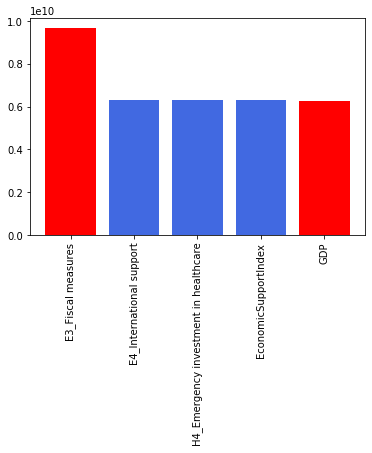

Linear Regression: Features with highest magnitude                                coefficients in absolute value
                              Feature   Coefficient
0                           Intercept -9.674786e+09
182       C3_Cancel public events_2.0  6.314511e+09
181       C3_Cancel public events_1.0  6.314511e+09
180       C3_Cancel public events_0.0  6.314511e+09
191  C6_Stay at home requirements_0.0 -6.282278e+09
192  C6_Stay at home requirements_1.0 -6.282278e+09
193  C6_Stay at home requirements_2.0 -6.282278e+09
194  C6_Stay at home requirements_3.0 -6.282278e+09
205             E1_Income support_2.0  5.290808e+09
204             E1_Income support_1.0  5.290808e+09

Bias: 1.13
Mean squared error: 2.33
RSS: 4882.76
Variance score: 0.90

R2 score: 0.68

Cutting dataframe on date: 2020-05-05
Success: Features match
Success: No NAs remain
                           Feature  Coefficient
0                        Intercept     2.143230
8             EconomicSupportIndex     0.34746

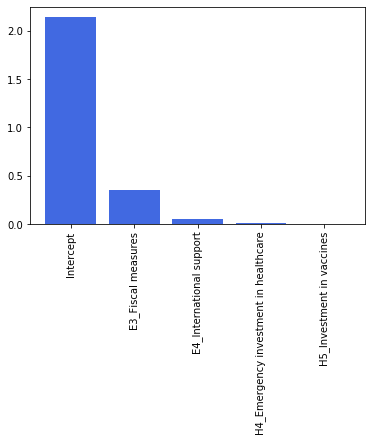

Lasso: Features with highest magnitude                                coefficients in absolute value
                           Feature  Coefficient
0                        Intercept     2.143230
8             EconomicSupportIndex     0.347468
19   Days Elapsed Since First Case     0.056539
18                       Day Count     0.007406
5                  StringencyIndex     0.001210
150                 Country_Sweden    -0.000000
140           Country_Sierra Leone     0.000000
141              Country_Singapore    -0.000000
142        Country_Slovak Republic    -0.000000
143               Country_Slovenia     0.000000

Bias: 2.81
Mean squared error: 3.99
RSS: 8374.24
Variance score: 0.71

R2 score: 0.46

                          Feature  Coefficient
0                       Intercept     8.795956
85                   Country_Iran     2.028806
205         E1_Income support_2.0     1.955400
203         E1_Income support_0.0    -1.713844
116                 Country_Nepal    -1.598232
.

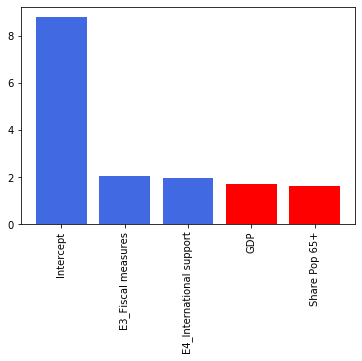

Ridge: Features with highest magnitude                                coefficients in absolute value
                         Feature  Coefficient
0                      Intercept     8.795956
85                  Country_Iran     2.028806
205        E1_Income support_2.0     1.955400
203        E1_Income support_0.0    -1.713844
116                Country_Nepal    -1.598232
112             Country_Mongolia    -1.494681
206  E2_Debt/contract relief_0.0    -1.480316
172        C1_School closing_0.0    -1.411753
83                 Country_India    -1.383885
31               Country_Belarus     1.349175

Bias: 1.08
Mean squared error: 2.40
RSS: 5037.26
Variance score: 0.89

R2 score: 0.67

                       Feature  Coefficient
7       ContainmentHealthIndex  -421.760990
5              StringencyIndex   338.691971
0                    Intercept    60.851997
214      H2_Testing policy_3.0    55.613742
211      H2_Testing policy_0.0   -55.221118
..                         ...          .

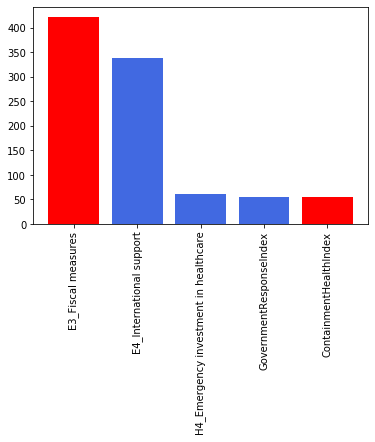

Linear Regression: Features with highest magnitude                                coefficients in absolute value
                     Feature  Coefficient
7     ContainmentHealthIndex  -421.760990
5            StringencyIndex   338.691971
0                  Intercept    60.851997
214    H2_Testing policy_3.0    55.613742
211    H2_Testing policy_0.0   -55.221118
215   H3_Contact tracing_0.0   -55.176386
217   H3_Contact tracing_2.0    55.046420
6    GovernmentResponseIndex    34.447060
212    H2_Testing policy_1.0   -18.789290
213    H2_Testing policy_2.0    18.396667

Bias: 1.08
Mean squared error: 2.38
RSS: 5003.49
Variance score: 0.89

R2 score: 0.68

Cutting dataframe on date: 2020-04-28
Success: Features match
Success: No NAs remain
                           Feature  Coefficient
0                        Intercept     2.216891
8             EconomicSupportIndex     0.309191
5                  StringencyIndex     0.163794
19   Days Elapsed Since First Case     0.053156
18          

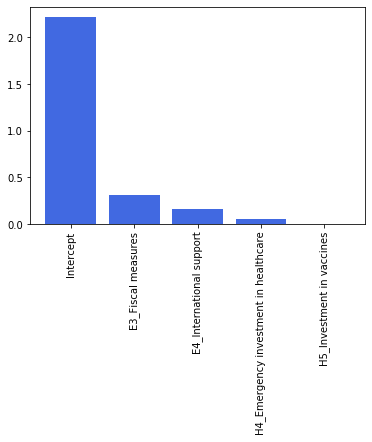

Lasso: Features with highest magnitude                                coefficients in absolute value
                           Feature  Coefficient
0                        Intercept     2.216891
8             EconomicSupportIndex     0.309191
5                  StringencyIndex     0.163794
19   Days Elapsed Since First Case     0.053156
18                       Day Count     0.003894
151            Country_Switzerland     0.000000
141              Country_Singapore    -0.000000
142        Country_Slovak Republic    -0.000000
143               Country_Slovenia     0.000000
144           Country_South Africa     0.000000

Bias: 2.55
Mean squared error: 4.34
RSS: 9175.69
Variance score: 0.70

R2 score: 0.42

                         Feature  Coefficient
0                      Intercept     9.593122
205        E1_Income support_2.0     2.063880
85                  Country_Iran     1.971516
203        E1_Income support_0.0    -1.771287
206  E2_Debt/contract relief_0.0    -1.529310
..     

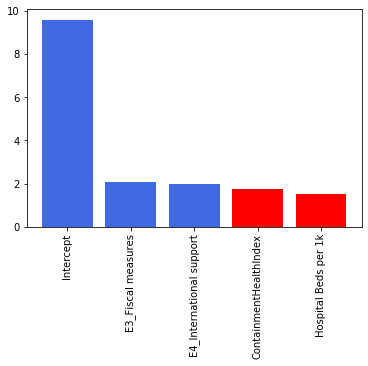

Ridge: Features with highest magnitude                                coefficients in absolute value
                         Feature  Coefficient
0                      Intercept     9.593122
205        E1_Income support_2.0     2.063880
85                  Country_Iran     1.971516
203        E1_Income support_0.0    -1.771287
206  E2_Debt/contract relief_0.0    -1.529310
112             Country_Mongolia    -1.523216
116                Country_Nepal    -1.472732
208  E2_Debt/contract relief_2.0     1.417888
83                 Country_India    -1.382608
172        C1_School closing_0.0    -1.366204

Bias: 1.01
Mean squared error: 2.44
RSS: 5158.21
Variance score: 0.88

R2 score: 0.67

                                   Feature   Coefficient
0                                Intercept  4.661774e+10
164       Country_United States of America  1.851460e+10
206            E2_Debt/contract relief_0.0 -1.828478e+10
207            E2_Debt/contract relief_1.0 -1.828478e+10
208            E2_De

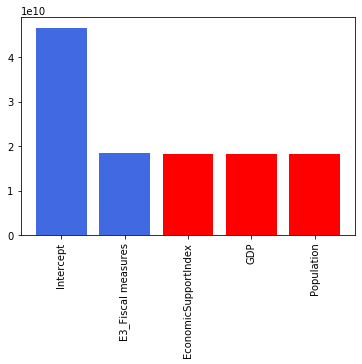

Linear Regression: Features with highest magnitude                                coefficients in absolute value
                                 Feature   Coefficient
0                              Intercept  4.661774e+10
164     Country_United States of America  1.851460e+10
206          E2_Debt/contract relief_0.0 -1.828478e+10
207          E2_Debt/contract relief_1.0 -1.828478e+10
208          E2_Debt/contract relief_2.0 -1.828478e+10
216               H3_Contact tracing_0.0 -1.470761e+10
217               H3_Contact tracing_1.0 -1.470761e+10
218               H3_Contact tracing_2.0 -1.470761e+10
211  H1_Public information campaigns_2.0  1.358680e+10
210  H1_Public information campaigns_1.0  1.358680e+10

Bias: 1.01
Mean squared error: 2.43
RSS: 5135.14
Variance score: 0.88

R2 score: 0.67

Cutting dataframe on date: 2020-04-21
Success: Features match
Success: No NAs remain
                           Feature  Coefficient
0                        Intercept     2.227549
6          Go

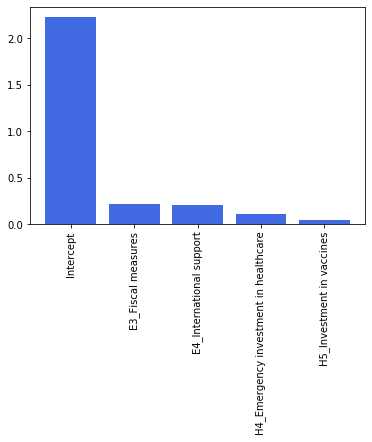

Lasso: Features with highest magnitude                                coefficients in absolute value
                           Feature  Coefficient
0                        Intercept     2.227549
6          GovernmentResponseIndex     0.219709
8             EconomicSupportIndex     0.209258
5                  StringencyIndex     0.105772
19   Days Elapsed Since First Case     0.048866
18                       Day Count     0.000103
142        Country_Slovak Republic    -0.000000
143               Country_Slovenia     0.000000
141              Country_Singapore     0.000000
144           Country_South Africa     0.000000

Bias: 2.27
Mean squared error: 5.11
RSS: 10827.80
Variance score: 0.67

R2 score: 0.32

                      Feature  Coefficient
0                   Intercept     9.870979
205     E1_Income support_2.0     2.090254
85               Country_Iran     1.882329
203     E1_Income support_0.0    -1.708294
112          Country_Mongolia    -1.605098
..                      

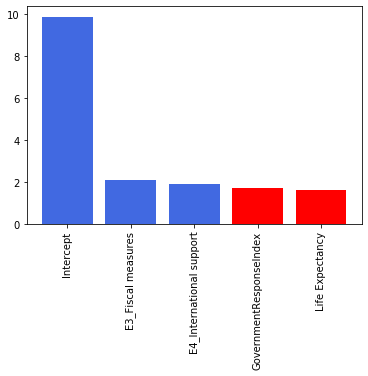

Ridge: Features with highest magnitude                                coefficients in absolute value
                         Feature  Coefficient
0                      Intercept     9.870979
205        E1_Income support_2.0     2.090254
85                  Country_Iran     1.882329
203        E1_Income support_0.0    -1.708294
112             Country_Mongolia    -1.605098
206  E2_Debt/contract relief_0.0    -1.553873
208  E2_Debt/contract relief_2.0     1.492464
83                 Country_India    -1.345067
172        C1_School closing_0.0    -1.308201
116                Country_Nepal    -1.256788

Bias: 0.93
Mean squared error: 2.55
RSS: 5390.44
Variance score: 0.87

R2 score: 0.66

                                   Feature   Coefficient
164       Country_United States of America -2.099230e+09
0                                Intercept  1.681894e+09
206            E2_Debt/contract relief_0.0 -1.609434e+09
207            E2_Debt/contract relief_1.0 -1.609434e+09
208            E2_De

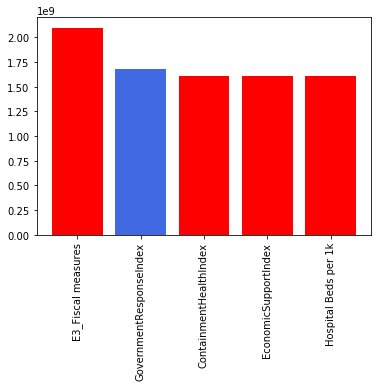

Linear Regression: Features with highest magnitude                                coefficients in absolute value
                                 Feature   Coefficient
164     Country_United States of America -2.099230e+09
0                              Intercept  1.681894e+09
206          E2_Debt/contract relief_0.0 -1.609434e+09
207          E2_Debt/contract relief_1.0 -1.609434e+09
208          E2_Debt/contract relief_2.0 -1.609434e+09
50                         Country_China -1.305998e+09
151                  Country_Switzerland  1.198168e+09
83                         Country_India  1.166483e+09
103                   Country_Luxembourg  9.453663e+08
209  H1_Public information campaigns_0.0 -8.702543e+08

Bias: 0.93
Mean squared error: 2.55
RSS: 5390.53
Variance score: 0.87

R2 score: 0.66



In [3]:
#filepath = '../data/covid_df_protocol_3.pkl'
weeks_for_cv = [0,1,2,3,4,5,6]
#df = pd.read_pickle(filepath)
n_weeks_prediction = 2
results = {}
for i in weeks_for_cv:
    shorter_df = pipeline.cut_df_on_weeks(df, i)
    df_train, df_test = pipeline.split_and_scale_on_last_weeks(shorter_df, n_weeks_prediction)
    pipeline.sanity_check(df_train, df_test)
    #df_train = df_train.dropna()
    #df_test = df_test.dropna()
    X_train, y_train = pipeline.divide_target_and_features(df_train, 'log_cases')
    X_test, y_test = pipeline.divide_target_and_features(df_test, 'log_cases')
    dct = pipeline.train_and_evaluate(X_train, y_train, X_test, y_test)
    results['Until week: ' +str(i)] = dct

In [7]:
# summarizing time seried nested Cross Validation (metric used = R2): 

metrics_r2 = pd.DataFrame(columns=['Lasso','Ridge','Linear Regression'])
for i, mkey in enumerate(results):
    for key in results[mkey]:
        metrics_r2.loc[i,key] = results[mkey][key][4]
metrics_r2

,Lasso,Ridge,Linear Regression
0,0.34869,0.748289,0.751871
1,0.386453,0.695073,0.697676
2,0.425606,0.678565,0.679607
3,0.450004,0.674249,0.675365
4,0.458029,0.673994,0.67618
5,0.418316,0.673,0.674462
6,0.324463,0.663695,0.66369


In [14]:
# finding averages across all folds

print("Lasso 7 fold avg:", metrics_r2['Lasso'].mean())
print("Ridge 7 fold avg:", metrics_r2['Ridge'].mean())
print("Linear Regression 7 fold avg:", metrics_r2['Linear Regression'].mean() )

Lasso 7 fold avg: 0.40165142100778917
Ridge 7 fold avg: 0.6866950469493363
Linear Regression 7 fold avg: 0.688407427102794


### Conclusion: 

- in this Time Series Nested Cross Validation test, the Linear Regression Model performs the best.

## <FIXME: WORK FROM HERE>

In [3]:
df.columns

Index(['Country', 'Date', 'C1_School closing', 'C2_Workplace closing',
       'C3_Cancel public events', 'C4_Restrictions on gatherings',
       'C5_Close public transport', 'C6_Stay at home requirements',
       'C7_Restrictions on internal movement',
       'C8_International travel controls', 'E1_Income support',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'StringencyIndex', 'GovernmentResponseIndex', 'ContainmentHealthIndex',
       'EconomicSupportIndex', 'Confirmed Cases', 'Recovered', 'Deaths', 'GDP',
       'Population', 'Share Pop 65+', 'Hospital Beds per 1k',
       'Life Expectancy', 'Physicians per 1k',
       'Universal Health Care Coverage Index', 'Diabetes Prevalence',
       'Current Health Expenditure Per Capita, PPP', 'Day Count',
       'Days Elapsed Since

In [61]:
from sklearn import linear_model
import numpy as np
n_weeks_prediction = 2
df['log_cases'] = np.log(df['Confirmed Cases'] + 1)
df_train, df_test = pipeline.split_and_scale_on_last_weeks(df_spain, n_weeks_prediction)
X_train, y_train = pipeline.divide_target_and_features(df_train, 'log_cases')
X_test, y_test = pipeline.divide_target_and_features(df_test, 'log_cases')
lreg = linear_model.LinearRegression()
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)

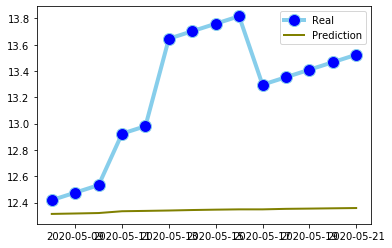

In [62]:
pipeline.plot_real_vs_prediction(X_test, y_pred, y_test, 'Spain')

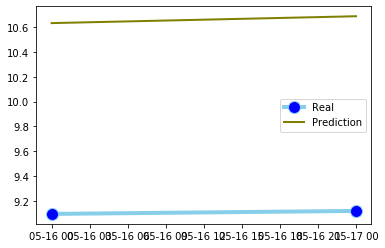

In [9]:
pipeline.plot_real_vs_prediction(X_test, y_pred, y_test, 'Chile')

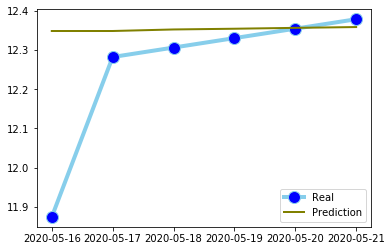

In [10]:
pipeline.plot_real_vs_prediction(X_test, y_pred, y_test, 'Spain')

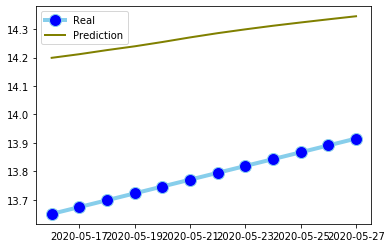

In [11]:
pipeline.plot_real_vs_prediction(X_test, y_pred, y_test, 'United States of America')

In [28]:
predictions = pipeline.predictions_every_country(X_test.columns[19:164], X_test, y_pred, y_test)
#predictions = pipeline.predictions_every_country([X_test.columns[19]], X_test, y_pred, y_test)

KeyError: 'Country_United States of America'

In [29]:
spain = pd.DataFrame()
spain['Spain real'] = y_test
spain['Spain pred'] = y_pred
spain['date'] = predictions.index

In [32]:
spain = spain.set_index('date')
spain

,Spain real,Spain pred
date,,
2020-05-16,12.314290,1.244043e+01
2020-05-17,12.317520,1.248535e+01
2020-05-18,12.320967,1.252344e+01
2020-05-19,12.334629,-2.720269e+07
2020-05-20,12.337237,-2.720269e+07
2020-05-21,12.340131,-3.745883e+07
2020-05-22,12.343837,-3.745883e+07
2020-05-23,12.346634,-3.745883e+07
2020-05-24,12.348869,-3.745883e+07


In [14]:
predictions.head()

,Afghanistan real,Afghanistan prediction,Albania real,Albania prediction,Algeria real,Algeria prediction,Angola real,Angola prediction,Argentina real,Argentina prediction,...,Venezuela real,Venezuela prediction,Vietnam real,Vietnam prediction,Yemen real,Yemen prediction,Zambia real,Zambia prediction,Zimbabwe real,Zimbabwe prediction
date,,,,,,,,,,,,,,,,,,,,,
2020-05-16,8.764522,6.850647,6.839476,8.422456,8.827908,8.901507,3.891820,5.689538,8.962648,7.694289,...,6.224558,7.093339,5.765191,5.880071,4.812184,3.280651,6.522093,4.788202,3.761200,5.219018
2020-05-17,8.804625,6.874754,6.853299,8.446563,8.856518,8.925614,3.891820,5.754294,8.995785,7.718397,...,NaN,NaN,5.771441,5.904178,4.859812,3.304758,6.625392,4.812309,3.806662,5.243126
2020-05-18,8.864040,6.898861,6.855409,8.850055,8.882114,8.949721,3.931826,5.778401,9.032648,7.742504,...,NaN,NaN,5.783825,5.928285,4.875197,3.328866,6.635947,4.836416,3.850148,5.267233
2020-05-19,8.942984,6.922969,6.856462,8.874163,8.906258,8.973829,3.970292,5.802508,9.083643,7.766611,...,NaN,NaN,5.783825,5.952392,5.123964,3.352973,6.650279,4.860524,3.850148,5.291340
2020-05-20,9.005282,6.947076,6.872128,8.898270,8.928375,8.997936,3.970292,5.826616,9.136048,7.790718,...,NaN,NaN,5.783825,5.976500,5.220356,3.377080,6.725034,4.884631,3.891820,5.315447


In [15]:
pipeline.train_and_evaluate(X_train, y_train, X_test, y_test)

Lasso: Features with highest magnitude                                coefficients in absolute value
                           Feature  Coefficient
0                        Intercept     2.404227
8             EconomicSupportIndex     0.191144
19   Days Elapsed Since First Case     0.064166
18                       Day Count     0.005049
145            Country_Switzerland     0.000000
135              Country_Singapore    -0.000000
136        Country_Slovak Republic     0.000000
137               Country_Slovenia     0.000000
138           Country_South Africa     0.000000
139            Country_South Korea     0.000000

Bias: 3.22
Mean squared error: 4.09
RSS: 6070.68
Variance score: 0.75

R2 score: 0.41

Ridge: Features with highest magnitude                                coefficients in absolute value
                   Feature  Coefficient
0                Intercept     9.725986
110          Country_Nepal    -3.103819
161        Country_Vietnam    -2.754382
106       Country_Mong

{'Lasso': (3.2236579693305067,
  4.085250674275898,
  6070.6825019739845,
  0.7541839491960279,
  0.4058991396170867),
 'Ridge': (1.2301038523835528,
  1.949422790037692,
  2896.84226599601,
  0.9061999523682485,
  0.7165036250763896),
 'Linear Regression': (1.2284795630016718,
  1.9350478092212535,
  2875.481044502783,
  0.9063238105458267,
  0.7185941182069115)}

In [20]:
predictions.to_pickle("../data/predictions.pkl")

In [36]:
spain.to_pickle("../data/predictions_log_spain.pkl")